<a href="https://colab.research.google.com/github/ShaunakSen/Deep-Learning/blob/master/FreecodeCamp_DeepLizard_Keras_with_Tensorflow_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FreecodeCamp DeepLizard Keras with Tensorflow Course

> Written notes on the tutorial by [DeepLizard](https://youtube.com/deeplizard) and [FreeCodeCamp](https://www.youtube.com/channel/UC8butISFwT-Wl7EV0hUK0BQ): https://www.youtube.com/watch?v=qFJeN9V1ZsI

---

### Data preparation and processing

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_samples, train_labels = [], []

For this simple task, we'll be creating our own example data set.

#### Data Creation

As motivation for this data, let’s suppose that an experimental drug was tested on individuals ranging from age 13 to 100 in a clinical trial. The trial had 2100 participants. Half of the participants were under 65 years old, and the other half was 65 years of age or older.

The trial showed that around 95% of patients 65 or older experienced side effects from the drug, and around 95% of patients under 65 experienced no side effects, generally showing that elderly individuals were more likely to experience side effects.

Ultimately, we want to build a model to tell us whether or not a patient will experience side effects solely based on the patient's age. The judgement of the model will be based on the training data.

Note that with the simplicity of the data along with the conclusions drawn from it, a neural network may be overkill, but understand this is just to first get introduced to working with data for deep learning, and later, we'll be making use of more advanced data sets.



In [3]:
young_population = old_population = int(2100/2)

minority = int(0.05*old_population)*2

print (minority)

104


So the minority population is around 100 people (50 old and 50 young)

In [4]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

    ### we have added 100 of the minority to the data

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [5]:
print (len(train_samples), len(train_labels))

2100 2100


This code creates 2100 samples and stores the age of the individuals in the train_samples list and stores whether or not the individuals experienced side effects in the train_labels list.

Convert the data to numpy arrays:

In [6]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
### before shuffling
print (train_labels[:10], train_samples[:10])

train_labels, train_samples = shuffle(train_labels, train_samples) ### consistent order; so keeps track of the correspondence bw the 2 as we shuffle
print (train_labels[:10], train_samples[:10])


[1 0 1 0 1 0 1 0 1 0] [21 83 23 66 60 87 24 81 40 85]
[0 1 1 1 1 1 1 1 1 1] [ 18  67  86  21  89  80  85  80  90 100]


In [7]:
### test for shuffle
t1 = np.array([23,34,12,11,34,65,32])
t2 = np.array([1,1,0,0,0,1,1])

t1_new,t2_new = shuffle(t1,t2)

print(t1_new, t2_new)

[34 65 32 23 11 12 34] [1 1 1 1 0 0 0]


> Ok, so shuffle does keep track of the correspondence

In this form, we now have the ability to pass the data to the model because it is now in the required format, however, before doing that, we'll first scale the data down to a range from 0 to 1.

We'll use scikit-learn’s MinMaxScaler class to scale all of the data down from a scale ranging from 13 to 100 to be on a scale from 0 to 1.

We reshape the data as a technical requirement just since the fit_transform() function doesn’t accept 1D data by default.



In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(X=train_samples.reshape(-1, 1))

print (scaled_train_samples[:5])

[[0.05747126]
 [0.62068966]
 [0.83908046]
 [0.09195402]
 [0.87356322]]


### Create An Artificial Neural Network With TensorFlow's Keras API

---



In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [10]:
physical_devices = tf.config.experimental.list_physical_devices("GPU")
print (physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


set_memory_growth() attempts to allocate only as much GPU memory as needed at a given time, and continues to allocate more when needed. If this is not enabled, then we may end up running into the error below when we train the model later.

`Blas GEMM launch failed`

In [11]:
tf.config.experimental.set_memory_growth(device=physical_devices[0], enable=True)

#### Build A Sequential Model


In [12]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

As discussed, we’ll be training our network on the data that we generated and processed in the previous episode, and recall, this data is one-dimensional. The input_shape parameter expects a tuple of integers that matches the shape of the input data, so we correspondingly specify (1,) as the input_shape of our one-dimensional data.

You can think of the way we specify the input_shape here as acting as an **implicit input layer**. The input layer of a neural network is the underlying raw data itself, therefore we don't create an explicit input layer. **This first Dense layer that we're working with now is actually the first hidden layer**.

Lastly, an optional parameter that we’ll set for the Dense layer is the activation function to use after this layer. We’ll use the popular choice of relu. Note, if you don’t explicitly set an activation function, then Keras will use the linear activation function.

Our next layer will also be a Dense layer, and this one will have 32 nodes. The choice of how many neurons this node has is also arbitrary, as the idea is to create a simple model, and then test and experiment with it. If we notice that it is insufficient, then at that time, we can troubleshoot the issue and begin experimenting with changing parameters, like number of layers, nodes, etc.

Lastly, we specify the output layer. This layer is also a Dense layer, and it will have 2 neurons. This is because we have two possible outputs: either a patient experienced side effects, or the patient did not experience side effects.

This time, the activation function we’ll use is softmax, which will give us a probability distribution among the possible outputs.

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


#### How do we arrive at 642 trainable params:

1. 1 ip. Then 1 hidden layer with 16 nodes. So 16 connections (wts) and 16 (biases): `16x2`

2. Next layer has 32 nodes. `16*32` wts + 32 biases: `(16*32)+32`

3. Last layer has 2 nodes. So `32*2` wts + 2 biases: `32*2+2`

`16*2 + (16*32)+32 + (32*2)+2 = 642`

### Train An Artificial Neural Network With Keras

---

The first thing we need to do to get the model ready for training is call the compile() function on it.



In [14]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, verbose=2, shuffle=True)

Epoch 1/30
210/210 - 0s - loss: 0.6650 - accuracy: 0.5390
Epoch 2/30
210/210 - 0s - loss: 0.6443 - accuracy: 0.5948
Epoch 3/30
210/210 - 0s - loss: 0.6172 - accuracy: 0.6676
Epoch 4/30
210/210 - 0s - loss: 0.5824 - accuracy: 0.7452
Epoch 5/30
210/210 - 0s - loss: 0.5497 - accuracy: 0.7762
Epoch 6/30
210/210 - 0s - loss: 0.5173 - accuracy: 0.8186
Epoch 7/30
210/210 - 0s - loss: 0.4855 - accuracy: 0.8429
Epoch 8/30
210/210 - 0s - loss: 0.4556 - accuracy: 0.8586
Epoch 9/30
210/210 - 0s - loss: 0.4281 - accuracy: 0.8719
Epoch 10/30
210/210 - 0s - loss: 0.4037 - accuracy: 0.8943
Epoch 11/30
210/210 - 0s - loss: 0.3828 - accuracy: 0.8962
Epoch 12/30
210/210 - 0s - loss: 0.3649 - accuracy: 0.9043
Epoch 13/30
210/210 - 0s - loss: 0.3499 - accuracy: 0.9114
Epoch 14/30
210/210 - 0s - loss: 0.3372 - accuracy: 0.9119
Epoch 15/30
210/210 - 0s - loss: 0.3267 - accuracy: 0.9181
Epoch 16/30
210/210 - 0s - loss: 0.3178 - accuracy: 0.9224
Epoch 17/30
210/210 - 0s - loss: 0.3105 - accuracy: 0.9248
Epoch 

We set shuffle to True as we do not want the model to learn any implicit order by which it sees the training samples

### Build A Validation Set With TensorFlow's Keras API

---

Recall that we previously built a training set on which we trained our model. With each epoch that our model is trained, the model will continue to learn the features and characteristics of the data in this training set.

The hope is that later we can take this model, apply it to new data, and have the model accurately predict on data that it hasn’t seen before based solely on what it learned from the training set.

Now, let’s discuss where the addition of a validation set comes into play.

Before training begins, we can choose to remove a portion of the training set and place it in a validation set. Then, during training, the model will train only on the training set, and it will validate by evaluating the data in the validation set.

Essentially, the model is learning the features of the data in the training set, taking what it's learned from this data, and then predicting on the validation set. During each epoch, we will see not only the loss and accuracy results for the training set, but also for the validation set.

This allows us to see how well the model is generalizing on data it wasn’t trained on because, recall, the validation data should not be part of the training data.

This also helps us see whether or not the model is overfitting. **Overfitting occurs when the model only learns the specifics of the training data and is unable to generalize well on data that it wasn’t trained on.**



#### Create a Validation set

The first way is to create a data structure to hold a validation set, and place data directly in that structure in the same nature we did for the training set.

This data structure should be a tuple `valid_set = (x_val, y_val)` of Numpy arrays or tensors, where `x_val` is a numpy array or tensor containing validation samples, and `y_val` is a numpy array or tensor containing validation labels.

When we call model.fit(), we would pass in the validation set in addition to the training set. We pass the validation set by specifying the validation_data parameter.

```
model.fit(
      x=scaled_train_samples
    , y=train_labels
    , validation_data=valid_set
    , batch_size=10
    , epochs=30
    , verbose=2
)
```

When the model trains, it would continue to train only on the training set, but additionally, it would also be evaluating the validation set.

There is another way to create a validation set, and it saves a step!

If we don’t already have a specified validation set created, then when we call `model.fit()`, we can set a value for the validation_split parameter. It expects a fractional number between 0 and 1. Suppose that we set this parameter to 0.1.

```
model.fit(
      x=scaled_train_samples
    , y=train_labels
    , validation_split=0.1
    , batch_size=10
    , epochs=30
    , verbose=2
)
```

With this parameter specified, Keras will split apart a fraction (10% in this example) of the training data to be used as validation data. **The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch.**


**Note that the fit() function shuffles the data before each epoch by default. When specifying the validation_split parameter, however, the validation data is selected from the last samples in the x and y data before shuffling.**

So imagine if in our training data we had all sick patients first and non-sick patients after. Then if we split off the last 10% as validation, its going to take all the non-sick patients! So, here is not a prob as we have already shuffled our training data before iteself, but if that is not so, this would be a problem and setting `shuffle=True` also will not help

Therefore, in the case we're using validation_split in this way to create our validation data, we need to be sure that our data has been shuffled ahead of time

In [16]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, verbose=2, shuffle=True, validation_split=0.1)

Epoch 1/30
189/189 - 1s - loss: 0.6653 - accuracy: 0.5661 - val_loss: 0.6419 - val_accuracy: 0.5905
Epoch 2/30
189/189 - 0s - loss: 0.6351 - accuracy: 0.6291 - val_loss: 0.6098 - val_accuracy: 0.6857
Epoch 3/30
189/189 - 0s - loss: 0.6042 - accuracy: 0.7021 - val_loss: 0.5753 - val_accuracy: 0.7476
Epoch 4/30
189/189 - 0s - loss: 0.5740 - accuracy: 0.7450 - val_loss: 0.5435 - val_accuracy: 0.7810
Epoch 5/30
189/189 - 0s - loss: 0.5444 - accuracy: 0.7804 - val_loss: 0.5119 - val_accuracy: 0.8190
Epoch 6/30
189/189 - 0s - loss: 0.5148 - accuracy: 0.8101 - val_loss: 0.4800 - val_accuracy: 0.8619
Epoch 7/30
189/189 - 0s - loss: 0.4853 - accuracy: 0.8344 - val_loss: 0.4490 - val_accuracy: 0.8714
Epoch 8/30
189/189 - 0s - loss: 0.4571 - accuracy: 0.8540 - val_loss: 0.4199 - val_accuracy: 0.8905
Epoch 9/30
189/189 - 0s - loss: 0.4310 - accuracy: 0.8709 - val_loss: 0.3933 - val_accuracy: 0.9000
Epoch 10/30
189/189 - 0s - loss: 0.4073 - accuracy: 0.8899 - val_loss: 0.3691 - val_accuracy: 0.9000

The accuracy and the val_accuracy is quite similar, so it does not seem that it is oevrfitting

### Make Predictions With An Artificial Neural Network Using Keras

At this point, the model we've been working with over the past few episodes has now been trained and validated. Given the results we’ve seen from the validation data, it appears that this model should do well on predicting on a new test set.

#### Creating The Test Set

We’ll create a test set in the same fashion for which we created the training set. **In general, the test set should always be processed in the same way as the training set**.



In [18]:
test_labels =  []
test_samples = []

for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [19]:
print (test_labels.shape, test_samples.shape)

(420,) (420,)


In [20]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [21]:
scaled_test_samples[:10]

array([[0.36781609],
       [0.77011494],
       [0.49425287],
       [0.71264368],
       [0.14942529],
       [0.13793103],
       [0.56321839],
       [0.72413793],
       [0.33333333],
       [0.70114943]])

#### Evaluating The Test Set



In [22]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

To this function, we pass in the test samples x, specify a batch_size, and specify which level of verbosity we want from log messages during prediction generation. The output from the predictions won't be relevant for us, so we're setting verbose=0 for no output.

Note that, unlike with training and validation sets, we do not pass the labels of the test set to the model during the inference stage.

To see what the model's predictions look like, we can iterate over them and print them out

In [23]:
predictions[:10]

array([[0.9334636 , 0.06653646],
       [0.09539703, 0.904603  ],
       [0.74362093, 0.25637907],
       [0.15310577, 0.84689426],
       [0.9675232 , 0.0324768 ],
       [0.9673561 , 0.03264396],
       [0.54697526, 0.45302474],
       [0.1351097 , 0.8648903 ],
       [0.9501645 , 0.04983545],
       [0.17301951, 0.8269805 ]], dtype=float32)

Each element in the predictions list is itself a list of length 2. The sum of the two values in each list is 1. The reason for this is because the two columns contain probabilities for each possible output: experienced side effects and did not experience side effects. Each element in the predictions list is a probability distribution over all possible outputs.

The first column contains the probability for each patient not experiencing side effects, which is represented by a 0. The second column contains the probability for each patient experiencing side effects, which is represented by a 1.

We can also look only at the most probable prediction.

In [24]:
rounded_predictions = np.argmax(predictions, axis=-1)

print (rounded_predictions[:10])

print (rounded_predictions.shape)

[0 1 0 1 0 0 0 1 0 1]
(420,)


From the printed prediction results, we can observe the underlying predictions from the model, however, we cannot judge how accurate these predictions are just by looking at the predicted output.

If we have corresponding labels for the test set, (for which, in this case, we do), then we can compare these true labels to the predicted labels to judge the accuracy of the model's evaluations. We'll see how to visualize this using a tool called a confusion matrix 

### Create A Confusion Matrix For Neural Network Predictions



In [25]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [26]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [27]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Next, we define the labels for the confusion matrix. In our case, the labels are titled “no side effects” and “had side effects.”



In [28]:
cm_plot_labels = ['no_side_effects','had_side_effects']

Lastly, we plot the confusion matrix by using the plot_confusion_matrix() function we just discussed. To this function, we pass in the confusion matrix cm and the labels cm_plot_labels, as well as a title for the confusion matrix.



Confusion matrix, without normalization
[[199  11]
 [ 10 200]]


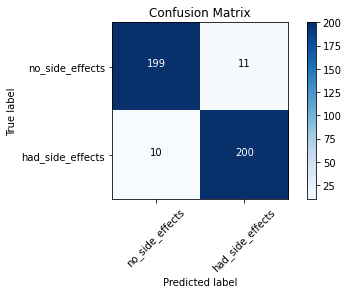

In [29]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

Looking at the plot of the confusion matrix, we have the predicted labels on the x-axis and the true labels on the y-axis. The blue cells running from the top left to bottom right contain the number of samples that the model accurately predicted. The white cells contain the number of samples that were incorrectly predicted.

There are 420 total samples in the test set. Looking at the confusion matrix, we can see that the model accurately predicted 399 out of 420 total samples. The model incorrectly predicted 21 out of the 420.

For the samples the model got correct, we can see that it accurately predicted that the patients would experience no side effects 199 times. It incorrectly predicted that the patient would have no side effects 10 times when the patient did actually experience side effects.

On the other side, the model accurately predicted that the patient would experience side effects 200 times that the patient did indeed experience side effects. It incorrectly predicted that the patient would have side effects 11 times when the patient actually did not experience side effects.

As you can see, this is a good way we can visually interpret how well the model is doing at its predictions and understand where it may need some work.